In [1]:
# test.py
import sys
sys.path.append('/software/pc24403/tfpcbpggsz/amp_ampgen_test')
from D0ToKSpipi2018 import *

# Create an instance to check if the issue is resolved
obj = PyD0ToKSpipi2018()
obj.init()  # Call some methods to ensure functionality

D0ToKSpipi2018 (Apr 30 2024) ==> Initialization !


In [27]:
import uproot as up
import numpy as np

import matplotlib.pyplot as plt
int_path='/software/pc24403/PCBPGGSZ/gen_toy/'
f = up.open(int_path+'D_model_alt_swap_2.root:flavour__DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names)
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]], dtype=np.float32)
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]], dtype=np.float32)
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]], dtype=np.float32)

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))



In [4]:
def get_mass(p1,p2):
    return ((p1[:,0]+p2[:,0])**2 - (p1[:,1]+p2[:,1])**2 - (p1[:,2]+p2[:,2])**2 - (p1[:,3]+p2[:,3])**2)


In [19]:
s12 = get_mass(p1, p2)
s13 = get_mass(p1, p3)
s23 = get_mass(p2, p3)
amp = []
ampbar = []
for i in range(s12.shape[0]):
    amp.append(obj.AMP(p1[i].tolist(), p2[i].tolist(), p3[i].tolist()))
    ampbar.append((obj.AMP(p1bar[i].tolist(), p3bar[i].tolist(), p2bar[i].tolist()))*-1)
amp = np.array(amp)
ampbar = np.array(ampbar)

In [18]:
print(abs(amp[0])**2)
print(abs(ampbar[0])**2)

0.3670112628253503
2.789935105559688


In [29]:
s12.shape

(660000,)

In [13]:
def DeltadeltaD(A, Abar):
    var = np.angle(A*np.conj(Abar))

    return var

In [14]:
phaseDiff = DeltadeltaD(amp, ampbar)

(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  62.,  15.,   0.],
        [  0.,   0.,   0., ...,  86.,  54.,  10.],
        ...,
        [  0., 107.,  95., ...,   0.,   0.,   0.],
        [  0.,  22.,  63., ...,   0.,   0.,   0.],
        [  0.,   0.,   9., ...,   0.,   0.,   0.]]),
 array([0.40614519, 0.43180954, 0.4574739 , 0.48313826, 0.50880262,
        0.53446698, 0.56013134, 0.5857957 , 0.61146006, 0.63712442,
        0.66278878, 0.68845314, 0.7141175 , 0.73978186, 0.76544622,
        0.79111058, 0.81677494, 0.8424393 , 0.86810366, 0.89376802,
        0.91943238, 0.94509674, 0.9707611 , 0.99642546, 1.02208982,
        1.04775418, 1.07341854, 1.0990829 , 1.12474725, 1.15041161,
        1.17607597, 1.20174033, 1.22740469, 1.25306905, 1.27873341,
        1.30439777, 1.33006213, 1.35572649, 1.38139085, 1.40705521,
        1.43271957, 1.45838393, 1.48404829, 1.50971265, 1.53537701,
        1.56104137, 1.58670573, 1.61237009, 1.63803445, 1.66369881,

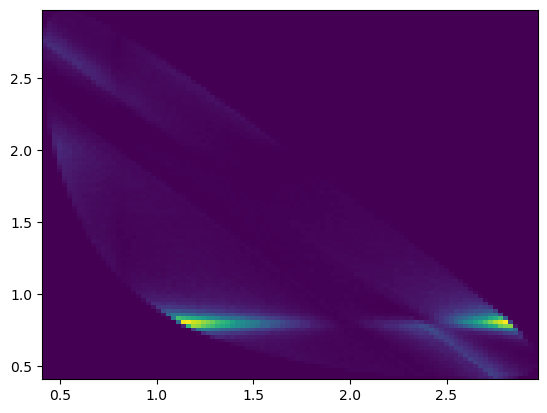

In [30]:
plt.hist2d(s12, s13, bins=100)

(array([ 3380.,  4988.,  5365.,  5557.,  5691.,  5887.,  5940.,  6288.,
         6736.,  7449.,  9116., 12692., 20385., 37722., 68789., 79263.,
        55209., 34764., 23163., 16800., 12885., 10564.,  8841.,  7746.,
         6642.,  5931.,  5329.,  4895.,  4362.,  4110.,  3849.,  3659.,
         3434.,  3227.,  3187.,  2995.,  2848.,  2910.,  2593.,  2645.,
         2522.,  2423.,  2351.,  2251.,  2314.,  2443.,  2364.,  2297.,
         2360.,  2391.,  2366.,  2445.,  2481.,  2635.,  2570.,  2655.,
         2671.,  2755.,  2936.,  2835.,  2963.,  2947.,  2936.,  2976.,
         2642.,  2525.,  2311.,  2192.,  2089.,  1902.,  2050.,  1970.,
         1965.,  2013.,  2147.,  2295.,  2258.,  2352.,  2614.,  2772.,
         2873.,  2980.,  3262.,  3356.,  3467.,  3442.,  3385.,  3261.,
         3018.,  2914.,  2703.,  2277.,  1843.,  1444.,  1140.,   903.,
          703.,   584.,   415.,   210.]),
 array([0.40630391, 0.43199593, 0.45768791, 0.48337993, 0.50907195,
        0.53476393, 0.5604

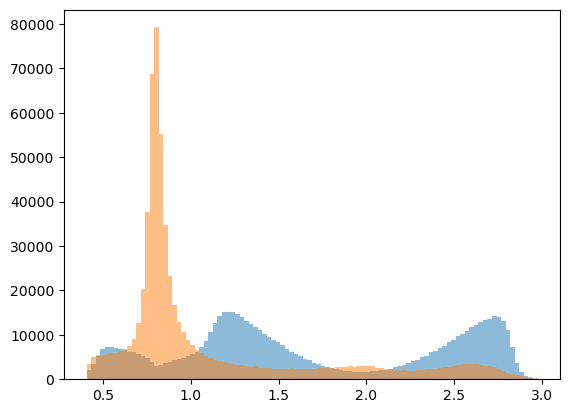

In [31]:
plt.hist(s12, bins=100, alpha=0.5)
plt.hist(s13, bins=100, alpha=0.5)

In [79]:
A_comb = (abs(amp)**2 + abs(ampbar)**2)*0.5*0.53+np.ones_like(abs(ampbar)**2)*0.47

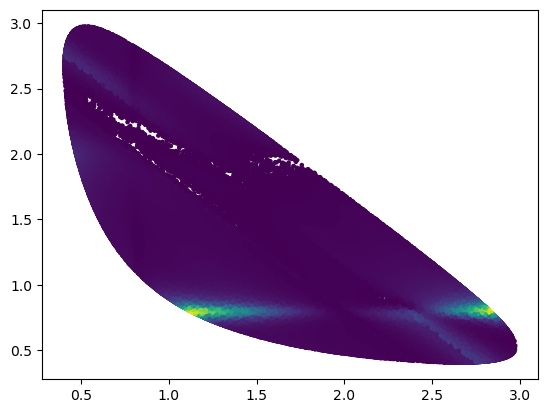

In [32]:
plt.scatter(s12, s13, c=abs(ampbar)**2, cmap='viridis', s=5)

In [2]:
import uproot as up
import numpy as np

import matplotlib.pyplot as plt
int_path='/software/pc24403/PCBPGGSZ/outputs/toy/1x/'
f = up.open(int_path+'b2dk_DD_test_1.root:Bminus_DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names,'flav==-1')
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]], dtype=np.float32)
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]], dtype=np.float32)
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]], dtype=np.float32)

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))

In [5]:
s12 = get_mass(p1, p2)
s13 = get_mass(p1, p3)
s23 = get_mass(p2, p3)
amp = []
ampbar = []
for i in range(s12.shape[0]):
    amp.append(obj.AMP(p1[i].tolist(), p2[i].tolist(), p3[i].tolist()))
    ampbar.append(obj.AMP(p1bar[i].tolist(), p3bar[i].tolist(), p2bar[i].tolist())*-1)
amp = np.array(amp)
ampbar = np.array(ampbar)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.42032397, 0.44485754, 0.46939112, 0.4939247 , 0.51845827,
        0.54299185, 0.56752542, 0.592059  , 0.61659257, 0.64112615,
        0.66565973, 0.6901933 , 0.71472688, 0.73926045, 0.76379403,
        0.7883276 , 0.81286118, 0.83739476, 0.86192833, 0.88646191,
        0.91099548, 0.93552906, 0.96006263, 0.98459621, 1.00912979,
        1.03366336, 1.05819694, 1.08273051, 1.10726409, 1.13179767,
        1.15633124, 1.18086482, 1.20539839, 1.22993197, 1.25446554,
        1.27899912, 1.3035327 , 1.32806627, 1.35259985, 1.37713342,
        1.401667  , 1.42620057, 1.45073415, 1.47526773, 1.4998013 ,
        1.52433488, 1.54886845, 1.57340203, 1.59793561, 1.62246918,
        1.64700276, 1.67153633, 1.69606991, 1.72060348, 1.74513706,
   

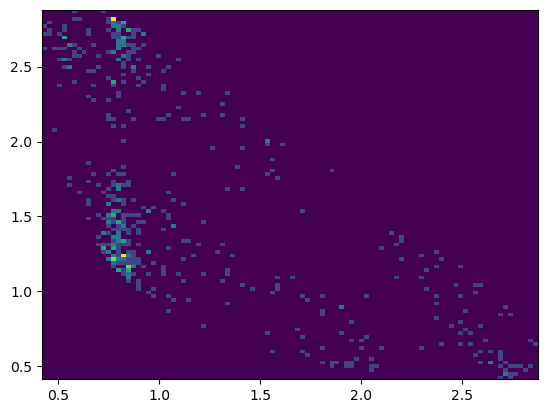

In [6]:
plt.hist2d(s13, s12, bins=100)

In [7]:
A_comb = (abs(amp)**2 + abs(ampbar)**2)*0.5*0.53+np.ones_like(abs(ampbar)**2)*0.47

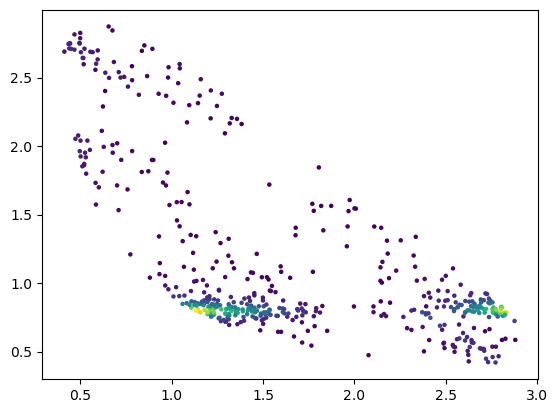

In [8]:
plt.scatter(s12, s13, c=abs(ampbar)**2, cmap='viridis', s=5)

(array([ 3.,  3.,  8.,  7., 10., 10.,  3.,  8.,  5.,  9.,  9.,  9.,  7.,
         8.,  2.,  2.,  6.,  4.,  4.,  7.,  9.,  3.,  2.,  7.,  2., 10.,
         9.,  9., 13., 15., 14., 16., 17., 17., 16., 17., 12., 15., 11.,
        10.,  9., 10., 11., 11.,  3.,  8.,  7.,  4.,  7.,  7.,  0.,  4.,
         3.,  4.,  3.,  3.,  2.,  4.,  4.,  2.,  2.,  1.,  0.,  1.,  1.,
         2.,  3.,  3.,  3.,  1.,  5.,  6.,  1.,  1.,  4.,  3.,  4.,  6.,
         5.,  3.,  9.,  8., 11., 10.,  7., 13., 11., 16.,  9., 12., 11.,
        10., 16.,  9., 12.,  9.,  3.,  1.,  1.,  1.]),
 array([0.4172045 , 0.44235432, 0.46750414, 0.49265394, 0.51780379,
        0.54295361, 0.56810337, 0.5932532 , 0.61840302, 0.64355284,
        0.66870266, 0.69385248, 0.71900231, 0.74415213, 0.76930195,
        0.79445171, 0.81960154, 0.84475136, 0.86990118, 0.895051  ,
        0.92020082, 0.94535065, 0.97050047, 0.99565029, 1.02080011,
        1.04594994, 1.07109976, 1.09624958, 1.1213994 , 1.14654922,
        1.17169905, 1.1968

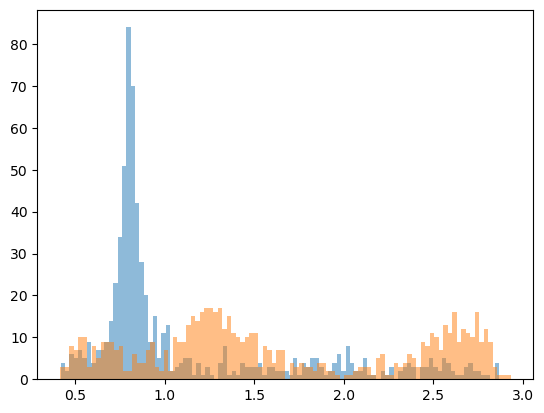

In [132]:
plt.hist(s12, bins=100, alpha=0.5)
plt.hist(s13, bins=100, alpha=0.5)

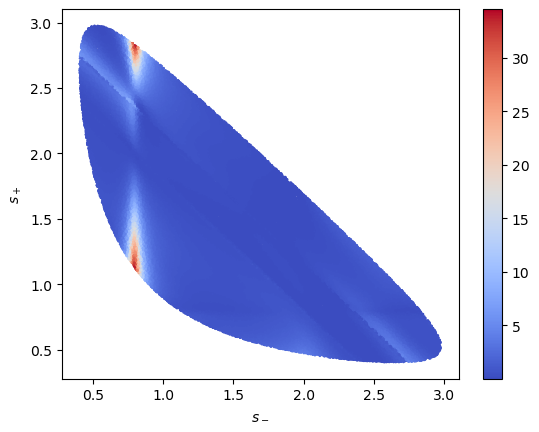

In [ ]:
plt.scatter(s12, s13, c=np.abs(amp)**2, cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar()

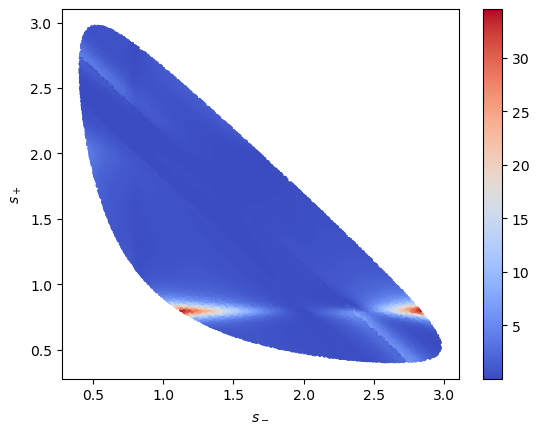

In [ ]:
plt.scatter(s12, s13, c=np.abs(ampbar)**2, cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar()

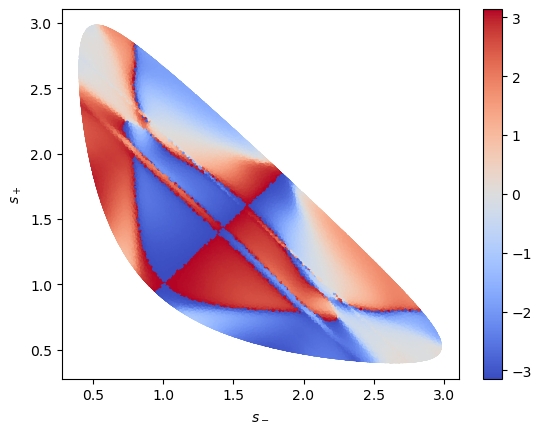

In [159]:
plt.scatter(s12[:1000000], s13[:1000000], c=phaseDiff, cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar() 

In [150]:
# read from txt file with format 'A Abar DeltaD' in amplittude.txt
amp_ampgen = []
ampbar_ampgen = []
phaseDiff_ampgen = []
with open('/shared/scratch/pc24403/cpfit_sig_noeff/sub/amplitudes.txt', 'r') as f:
    for line in f:
        amp_ampgen.append(float(line.split()[0]))
        ampbar_ampgen.append(float(line.split()[1]))
        phaseDiff_ampgen.append(float(line.split()[2]))
        if len(amp_ampgen) == 10000000:
            break


In [ ]:
int_path='/shared/scratch/pc24403/cpfit_sig_noeff/sub/'
f = up.open(int_path+'tuple.root:DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names)
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]])
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]])
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]])

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))



(array([ 3796.59696899,  6515.59549359,  9672.51958599, 12615.85624218,
        13844.6486926 , 13404.2593223 , 13481.72656112, 13029.63714139,
        12425.93585751, 11943.26060552, 11204.40383312, 10675.40454253,
        10035.08858656,  8934.25021569,  6956.21812507,  5620.40733818,
         5920.69287477,  6679.51883684,  7258.24356111,  7910.89922559,
         8247.81394965,  8808.02282872,  9751.57590711, 10262.9294084 ,
        11973.56147681, 13425.87071857, 15866.34760481, 20014.53549127,
        23492.9793069 , 26604.24261893, 27826.74589824, 28602.32712471,
        27568.14184902, 27143.13318583, 25055.79799357, 24631.05133233,
        23486.5954092 , 21536.70589056, 20413.97947282, 19148.55857286,
        17253.82445927, 16943.22322875, 15299.91121153, 14152.74295818,
        13234.59321278, 11530.45110424, 10340.76558926,  9802.49977837,
         8613.92928021,  8120.84549988,  6986.62853966,  6288.5778403 ,
         5812.08727881,  5147.55410618,  4736.97031448,  4274.28

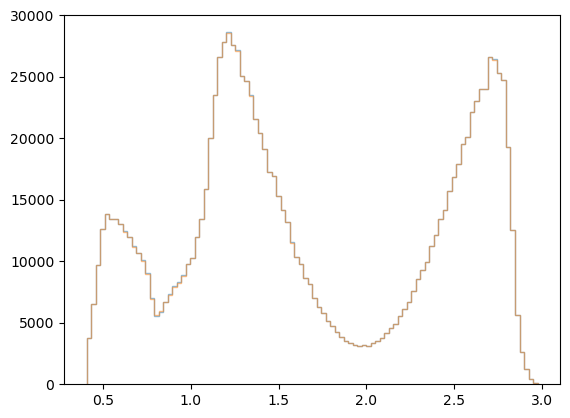

In [ ]:
plt.hist(s13[:1000000].tolist(), bins=100, alpha=0.5, label='s13', weights=(np.abs(amp_ampgen)**2).tolist(), histtype='step')
plt.hist(s13[:1000000].tolist(), bins=100, alpha=0.5, label='s13', weights=(np.abs(ampbar)**2).tolist(), histtype='step')


In [ ]:
print(amp[0])
print(ampbar[0])

(0.9225096009985854-0.30486784291871416j)
(-0.010822391005179212+0.5784163386136099j)


In [ ]:
s12_ampgen, s13_ampgen = get_mass(p1[:100000], p2[:100000]), get_mass(p1[:100000], p3[:100000])

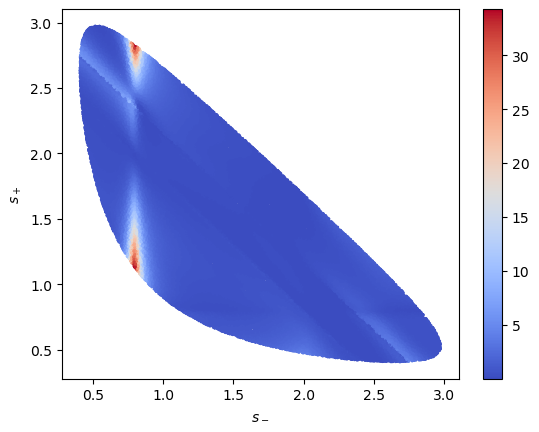

In [ ]:
plt.scatter(s12_ampgen, s13_ampgen, c=np.abs(amp[:100000])**2 cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar()

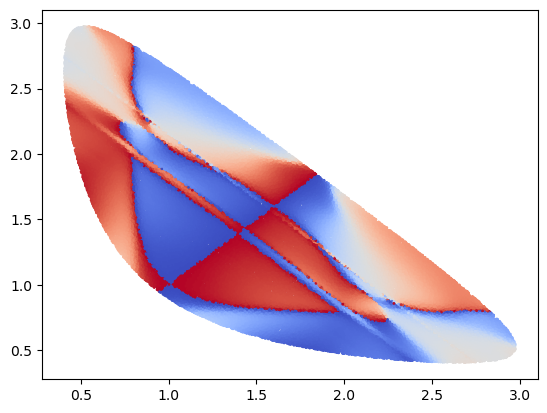

In [ ]:
plt.scatter(s12_ampgen, s13_ampgen, c=phaseDiff[:100000], cmap='coolwarm', s=1)

In [152]:
print(np.mean(np.abs(amp_ampgen)**2))
print(np.mean(np.abs(ampbar_ampgen)**2))
AAbar = np.array(amp_ampgen)*np.array(ampbar_ampgen)
real_part = np.mean(AAbar*np.cos(phaseDiff_ampgen))
imag_part = np.mean(AAbar*np.sin(phaseDiff_ampgen))
print(real_part)
print(imag_part)

1.228950376197287
1.228878237473732
-0.10715756093365955
0.00026020039035674783
